<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #2E64FE;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Sleep Health and Lifestyle <br>
    (Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Sleep Health and Lifestyle</div>**


## Goal
> ## Data preprocessing : Model-based Imputation
> ## Modeling : Predicting Sleep Disorder

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore", FitFailedWarning)

In [2]:
df = pd.read_csv('/kaggle/input/insights-into-sleep-patterns-and-daily-habits/sleep_health_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [3]:
df.drop('Person ID', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 400 non-null    object 
 1   Age                                    400 non-null    int64  
 2   Occupation                             400 non-null    object 
 3   Sleep Duration (hours)                 400 non-null    float64
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64
 5   Physical Activity Level (minutes/day)  400 non-null    int64  
 6   Stress Level (scale: 1-10)             400 non-null    int64  
 7   BMI Category                           400 non-null    object 
 8   Blood Pressure (systolic/diastolic)    400 non-null    object 
 9   Heart Rate (bpm)                       400 non-null    int64  
 10  Daily Steps                            400 non-null    int64  
 11  Sleep 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,39.95000,14.038883,18.0,29.00,40.0,49.000,90.0
Sleep Duration (hours),400.0,8.04125,2.390787,4.1,5.90,8.2,10.125,12.0
Quality of Sleep (scale: 1-10),400.0,6.12575,1.975733,1.0,4.70,6.1,7.425,10.0
Physical Activity Level (minutes/day),400.0,64.98500,32.297874,10.0,35.00,65.5,94.000,120.0
Stress Level (scale: 1-10),400.0,5.47250,2.808730,1.0,3.00,5.0,8.000,10.0
Heart Rate (bpm),400.0,75.99000,15.099334,50.0,63.00,77.0,90.000,100.0
Daily Steps,400.0,11076.51000,5364.789364,2067.0,6165.25,11785.5,15878.000,19958.0


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
Gender,400,2,Female,201
Occupation,400,4,Student,110
BMI Category,400,4,Overweight,109
Blood Pressure (systolic/diastolic),400,250,109/60,17
Sleep Disorder,110,2,Insomnia,79


In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Gender                                    0.0
Age                                       0.0
Occupation                                0.0
Sleep Duration (hours)                    0.0
Quality of Sleep (scale: 1-10)            0.0
Physical Activity Level (minutes/day)     0.0
Stress Level (scale: 1-10)                0.0
BMI Category                              0.0
Blood Pressure (systolic/diastolic)       0.0
Heart Rate (bpm)                          0.0
Daily Steps                               0.0
Sleep Disorder                           72.5
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
df['Sleep Disorder'].unique()

array([nan, 'Insomnia', 'Sleep Apnea'], dtype=object)

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing : Model-based Imputation</div>

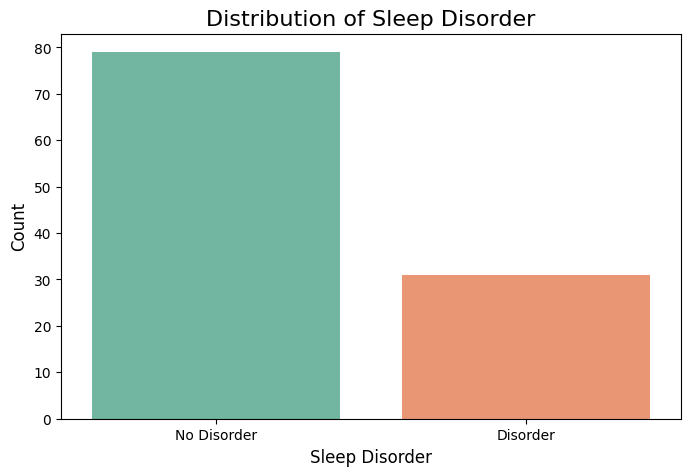

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sleep Disorder'], palette="Set2")
plt.title("Distribution of Sleep Disorder", fontsize=16)
plt.xlabel("Sleep Disorder", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], labels=['No Disorder', 'Disorder'], fontsize=10)
plt.show()

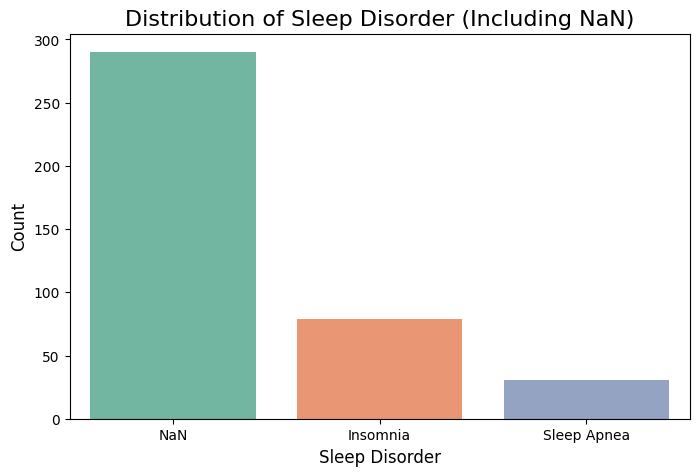

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sleep Disorder'].fillna('NaN'), palette="Set2")
plt.title("Distribution of Sleep Disorder (Including NaN)", fontsize=16)
plt.xlabel("Sleep Disorder", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.show()

In [10]:
filtered_df = df[df['Sleep Disorder'].notna()].copy()

label_encoders = {}
for col in filtered_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    filtered_df[col] = le.fit_transform(filtered_df[col])
    label_encoders[col] = le

le_y = LabelEncoder()
y = le_y.fit_transform(filtered_df['Sleep Disorder'])

X = filtered_df.drop(columns=['Sleep Disorder'])

display("Encoded X:", X.head())
display("Encoded y:", y[:5]) 

print("Type of y:", type(y))  

'Encoded X:'

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps
4,1,67,2,9.1,9.5,19,4,2,75,97,14945
8,1,25,0,11.9,7.2,27,8,3,10,99,16397
12,1,54,1,4.1,6.8,113,9,1,85,70,15440
18,0,26,0,9.2,6.4,93,9,3,13,78,9957
19,1,27,0,10.6,8.1,94,8,0,12,58,17796


'Encoded y:'

array([0, 1, 1, 1, 0])

Type of y: <class 'numpy.ndarray'>


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

In [12]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.772727,0.731818,0.772727,0.733240
1,SVM,0.772727,0.824380,0.772727,0.673660
2,KNN,0.636364,0.636364,0.636364,0.636364
3,Decision Tree,0.545455,0.599134,0.545455,0.569129
4,Random Forest,0.772727,0.824380,0.772727,0.673660
5,XGBoost,0.500000,0.531250,0.500000,0.515152
6,MLP Classifier,0.636364,0.569378,0.636364,0.601010


In [13]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

df_nan = df[df.isnull().any(axis=1)]
X_nan = df_nan.drop('Sleep Disorder', axis=1)

label_encoders = {}  
for col in X_nan.select_dtypes(include='object').columns:
    le = LabelEncoder()  
    X_nan[col] = le.fit_transform(X_nan[col]) 
    label_encoders[col] = le

X_nan_scaled = scaler.transform(X_nan)

predicted_y = model.predict(X_nan_scaled)
X_nan['Sleep Disorder'] = predicted_y
df = pd.concat([X_nan, filtered_df], axis=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 398
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 400 non-null    int64  
 1   Age                                    400 non-null    int64  
 2   Occupation                             400 non-null    int64  
 3   Sleep Duration (hours)                 400 non-null    float64
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64
 5   Physical Activity Level (minutes/day)  400 non-null    int64  
 6   Stress Level (scale: 1-10)             400 non-null    int64  
 7   BMI Category                           400 non-null    int64  
 8   Blood Pressure (systolic/diastolic)    400 non-null    int64  
 9   Heart Rate (bpm)                       400 non-null    int64  
 10  Daily Steps                            400 non-null    int64  
 11  Sleep Disor

In [15]:
df['Sleep Disorder'].unique()

array([0, 1])

In [16]:
df.info()

print("\n\nAfer Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 398
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 400 non-null    int64  
 1   Age                                    400 non-null    int64  
 2   Occupation                             400 non-null    int64  
 3   Sleep Duration (hours)                 400 non-null    float64
 4   Quality of Sleep (scale: 1-10)         400 non-null    float64
 5   Physical Activity Level (minutes/day)  400 non-null    int64  
 6   Stress Level (scale: 1-10)             400 non-null    int64  
 7   BMI Category                           400 non-null    int64  
 8   Blood Pressure (systolic/diastolic)    400 non-null    int64  
 9   Heart Rate (bpm)                       400 non-null    int64  
 10  Daily Steps                            400 non-null    int64  
 11  Sleep Disor

In [17]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,0,80,2,9.3,2.8,103,7,2,194,91,18544,0
1,1,86,3,10.4,1.0,35,7,2,196,68,4828,0
2,1,90,3,10.2,5.1,88,6,0,89,68,16908,1
3,1,29,1,8.3,10.0,20,10,1,101,55,6886,1
4,1,49,1,10.7,6.2,49,8,1,179,59,18767,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,53,3,10.2,5.1,59,10,1,84,57,19888,1
63,0,40,1,8.9,4.7,70,9,1,70,84,10924,1
64,0,41,2,7.2,8.6,26,2,2,36,78,7831,1
65,0,36,3,4.5,7.9,73,7,0,27,64,14497,1


In [18]:
# def outlier_remove(df, colname):  
#     Q1 = df[colname].quantile(0.25)
#     Q3 = df[colname].quantile(0.75)
#     IQR = Q3 - Q1  
#     lower_b = Q1 - 1.5 * IQR  
#     upper_b = Q3 + 1.5 * IQR  
#     return (df[colname] < lower_b) | (df[colname] > upper_b)

# for col in df.select_dtypes(include=['number']).columns:
#     df = df[~outlier_remove(df, col)]

# df.info()

### Outliers are not removed due to low data count.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [19]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.9250,0.916333,0.9250,0.919257
1,SVM,0.9250,0.930696,0.9250,0.898355
2,KNN,0.8500,0.850000,0.8500,0.850000
3,Decision Tree,0.8125,0.859988,0.8125,0.833847
4,Random Forest,0.9000,0.831646,0.9000,0.864474
5,XGBoost,0.8875,0.894618,0.8875,0.890862
6,MLP Classifier,0.8625,0.886607,0.8625,0.873190



Best Model:
Model        Logistic Regression
Accuracy                   0.925
Precision               0.916333
Recall                     0.925
F1-Score                0.919257
Name: 0, dtype: object


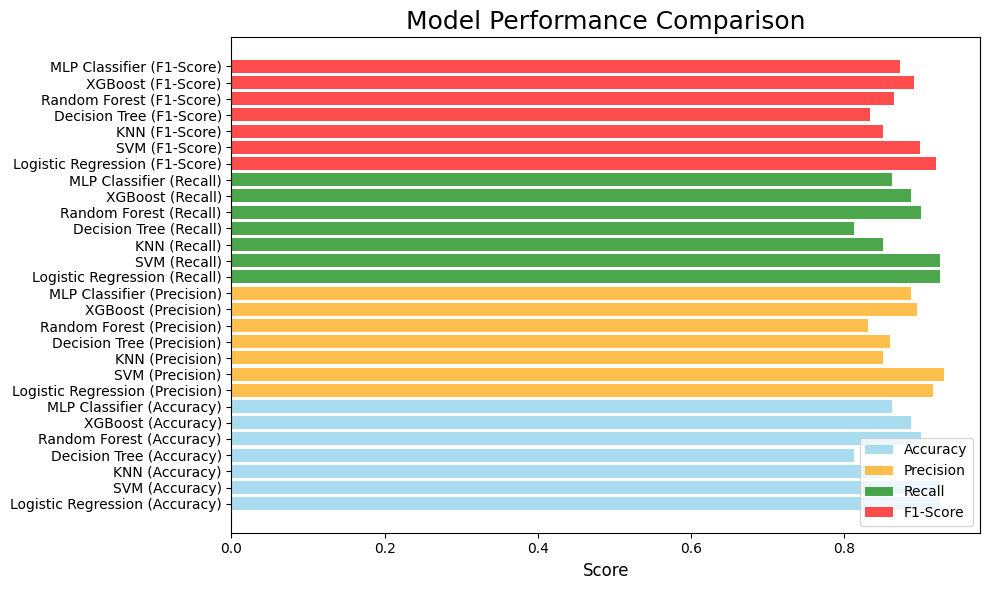


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.9250


In [20]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Ensemble techniques : Voting model (soft)</div>

In [21]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
}


results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

voting_clf = VotingClassifier(
    estimators=[
        ("Random Forest", models["Random Forest"]),
        ("LogisticRegression", models["LogisticRegression"]),
    ],
    voting='soft'  
)

voting_clf.fit(X_train_scaled, y_train)

y_pred_voting = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, y_pred_voting)
results["Voting Classifier"] = voting_acc
print("\nVoting Classifier Classification Report:\n")
print(classification_report(y_test, y_pred_voting))

print("\nModel Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        73
           1       0.00      0.00      0.00         7

    accuracy                           0.90        80
   macro avg       0.46      0.49      0.47        80
weighted avg       0.83      0.90      0.86        80


LogisticRegression Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.60      0.43      0.50         7

    accuracy                           0.93        80
   macro avg       0.77      0.70      0.73        80
weighted avg       0.92      0.93      0.92        80


Voting Classifier Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        73
           1       0.75      0.43      0.55         7

    accuracy                           0.94        80
  

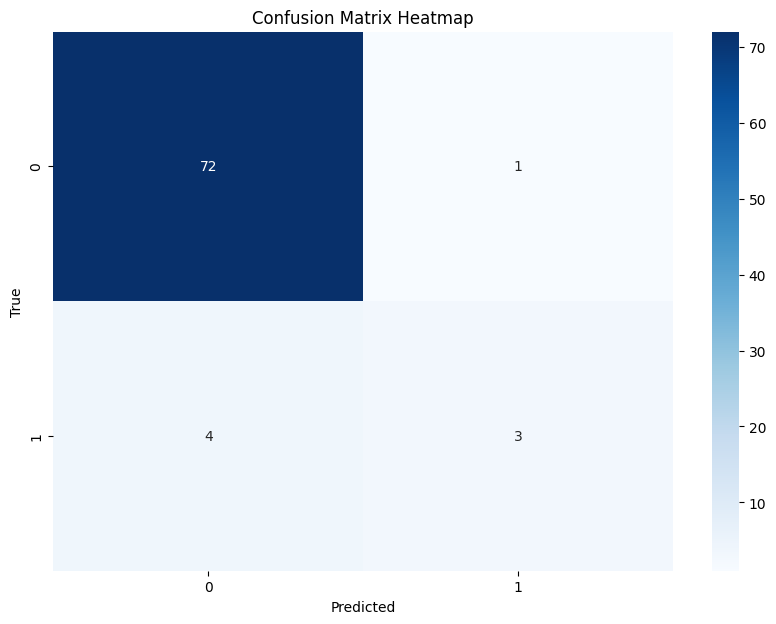

In [22]:
cm = confusion_matrix(y_test, y_pred_voting)  

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

### The missing values were imputed using a model-based imputation method, and the logistic regression model showed the best performance in the classification analysis. Finally, ensemble voting (soft) was used to improve the model's performance.

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

### If you have any questions, please feel free to ask me a question and use the code freely !

<a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
<a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a>